Here we can play around and analyze various things with the data we've previously scraped, cleaned, and organized. We can quickly use this notebook to answer statistical questions we may have for the data set.

In [20]:
from scripts import lichess_data_analyzer as lda
import scipy.stats as scs
import pandas as pd
import matplotlib.pyplot as plt

Lets make sure the data is clean and ready to analyze. We have also created some subsets consisting of only rated players so we can see some more interesting things.

In [21]:
player_df = pd.read_csv("data\july_data.csv")
lda.fix_stats(player_df)
titled_players_df = player_df.loc[player_df['title'].notnull()]
titled_players_df = titled_players_df.loc[player_df['title'] != "BOT"]
low_title_df = titled_players_df.loc[(titled_players_df['title'] == "CM") | (titled_players_df['title'] == "FM") | (titled_players_df['title'] == "NM")]

We can check where a specific rating will stand compared to the other 300k players we randomly sampled from Lichess.

In [29]:
lda.get_percentile(player_df.puzzle_rating, 2320)
lda.get_percentile(player_df.puzzle_rating, 1500)
lda.get_percentile(player_df.rapid_rating, 2150)
lda.get_percentile(player_df.rapid_rating, 1500)
lda.get_percentile(player_df.blitz_rating, 2200)
lda.get_percentile(player_df.storm_score, 20)
lda.get_percentile(player_df.streak_score, 30)

With a score of 2320, You are better than 96.5093% of players in the category puzzle_rating.
With a score of 1500, You are better than 34.4586% of players in the category puzzle_rating.
With a score of 2150, You are better than 96.173% of players in the category rapid_rating.
With a score of 1500, You are better than 49.1897% of players in the category rapid_rating.
With a score of 2200, You are better than 96.7224% of players in the category blitz_rating.
With a score of 20, You are better than 44.7377% of players in the category storm_score.
With a score of 30, You are better than 80.1669% of players in the category streak_score.


80.16692364416438

We can run some other types of analyses as well. How well does tactical ability relate to your overall rating?

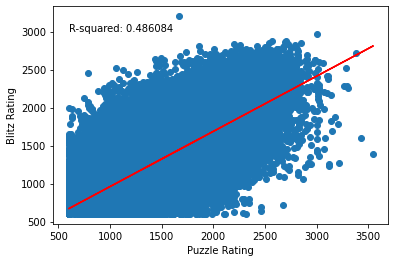

In [25]:
regression_df = player_df[player_df['puzzle_rating'].notna() & player_df['blitz_rating'].notna()]
res = scs.linregress(regression_df.puzzle_rating, regression_df.blitz_rating)
plt.plot(regression_df.puzzle_rating, regression_df.blitz_rating, 'o', label='original data')
plt.xlabel("Puzzle Rating")
plt.ylabel("Blitz Rating")
plt.plot(regression_df.puzzle_rating, res.intercept + res.slope*regression_df.puzzle_rating, 'r', label='fitted line')
plt.annotate(f"R-squared: {res.rvalue**2:.6f}", xy=(600, 3000))
plt.show()

In [26]:
low_title_df.describe()

,Unnamed: 0,nbFollowing,nbFollowers,completionRate,chess960_games,chess960_rating,chess960_rd,chess960_prog,puzzle_games,puzzle_rating,...,rapid_prog,storm_runs,storm_score,racer_runs,racer_score,streak_runs,streak_score,profile_fideRating,playTime_total,playTime_tv
count,433.000000,433.000000,433.000000,428.000000,268.000000,268.000000,268.000000,268.000000,401.000000,401.000000,...,433.000000,254.000000,254.000000,162.000000,162.000000,129.000000,129.000000,220.000000,4.330000e+02,4.330000e+02
mean,143514.184758,45.009238,191.540416,93.238318,172.440299,1975.373134,138.358209,8.861940,1007.029925,2371.775561,...,19.602771,55.220472,58.744094,25.716049,68.740741,15.961240,51.953488,2230.381818,2.088595e+06,8.592804e+04
std,86647.086405,70.880180,434.625780,7.614496,642.042627,207.192638,70.099651,62.194027,2038.739491,228.702972,...,60.968261,100.856052,14.236896,46.834248,15.424251,48.641771,27.292645,176.445083,2.263228e+06,1.953203e+05
min,1607.000000,0.000000,0.000000,57.000000,1.000000,1294.000000,45.000000,-252.000000,1.000000,1470.000000,...,-280.000000,1.000000,21.000000,1.000000,8.000000,1.000000,1.000000,1258.000000,1.954400e+04,0.000000e+00
25%,64127.000000,3.000000,32.000000,90.000000,10.750000,1865.750000,86.000000,-14.000000,103.000000,2252.000000,...,0.000000,4.000000,49.000000,3.000000,59.250000,2.000000,31.000000,2187.750000,6.474430e+05,3.022000e+03
50%,142796.000000,17.000000,78.000000,97.000000,35.000000,2007.000000,126.000000,0.000000,337.000000,2390.000000,...,0.000000,15.500000,59.000000,7.000000,69.000000,3.000000,48.000000,2267.000000,1.380432e+06,1.627400e+04
75%,217814.000000,53.000000,171.000000,100.000000,110.000000,2101.250000,176.000000,28.750000,956.000000,2528.000000,...,31.000000,53.000000,68.000000,24.000000,79.000000,11.000000,72.000000,2324.000000,2.662918e+06,7.031500e+04
max,299249.000000,400.000000,5756.000000,100.000000,7647.000000,2464.000000,429.000000,335.000000,23025.000000,3378.000000,...,405.000000,692.000000,112.000000,287.000000,114.000000,391.000000,141.000000,2883.000000,1.478171e+07,2.014248e+06
